In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using JLD2, Plots

In [3]:
using Base: @kwdef

In [4]:
using Random

In [5]:
using Statistics: mean

In [6]:
@kwdef struct Args
	nodes::Int = 20
	p_edge::Real = 0.1
	d_vsa::Int = 1024
	rng::AbstractRNG
end

Args

In [9]:
#file = "data/" * "result_2024-05-14T03:22:36.226.jld2"

"data/result_2024-05-14T03:22:36.226.jld2"

In [28]:
file = "data/data/" * "result_2024-05-13T00:27:31.714.jld2"

"data/data/result_2024-05-13T00:27:31.714.jld2"

In [29]:
data = load_object(file)

2-element Vector{Pair{String, Vector}}:
 "arguments" => Args[Args(25, 0.1, 512, Xoshiro(0x05140e23e351af36, 0x6ee19c752ad8315b, 0xcec33266229422cb, 0x748d11cca4852d15, 0x8b645c1a90632cd1)), Args(25, 0.1, 512, Xoshiro(0x22fb4190e7a07884, 0x9cd7d655c9be4a55, 0xe41233d24169ce71, 0xb5b9f8d081c697be, 0x65f39561185a85ea)), Args(25, 0.1, 512, Xoshiro(0x1faba917b14a2806, 0x72b36569356de68d, 0x3c9d7550b63c64b3, 0x4d6531f9d1ecb11a, 0xc49d81bb9e3aaae2)), Args(25, 0.1, 512, Xoshiro(0xe648b68f74e3da35, 0x2b60acf1a68eef6b, 0xd636a27c23921279, 0x56052d39e705ed69, 0xf1a026666b9482b2)), Args(25, 0.1, 512, Xoshiro(0xc7d7effc457d1b75, 0xa79c9c64602a29c1, 0x7781db5a216249d5, 0x194d4b6db14e851b, 0xc5541debe60cad9e)), Args(25, 0.1, 512, Xoshiro(0xc504309f4f78454d, 0xde6705f52f769fef, 0x143a6f743b39a541, 0xccf8a4e25c9766ff, 0x6029f1f48e203058)), Args(25, 0.1, 512, Xoshiro(0x301aaf950f2d54d0, 0x692c80e0619ab1be, 0xf3058ab5d976b891, 0x1b1e101867c6baf8, 0xe88e586e49be21a7)), Args(25, 0.1, 512, Xoshiro(0xf881e45

In [30]:
#file2 = "data/data/" * "result_2023-09-29T16:29:42.502.jld2"

In [31]:

#data2 = load_object(file2);

In [32]:
args_1 = data[1][2];
#args_2 = data2[1][2]; 

In [33]:
args_1

108-element Vector{Args}:
 Args(25, 0.1, 512, Xoshiro(0x05140e23e351af36, 0x6ee19c752ad8315b, 0xcec33266229422cb, 0x748d11cca4852d15, 0x8b645c1a90632cd1))
 Args(25, 0.1, 512, Xoshiro(0x22fb4190e7a07884, 0x9cd7d655c9be4a55, 0xe41233d24169ce71, 0xb5b9f8d081c697be, 0x65f39561185a85ea))
 Args(25, 0.1, 512, Xoshiro(0x1faba917b14a2806, 0x72b36569356de68d, 0x3c9d7550b63c64b3, 0x4d6531f9d1ecb11a, 0xc49d81bb9e3aaae2))
 Args(25, 0.1, 512, Xoshiro(0xe648b68f74e3da35, 0x2b60acf1a68eef6b, 0xd636a27c23921279, 0x56052d39e705ed69, 0xf1a026666b9482b2))
 Args(25, 0.1, 512, Xoshiro(0xc7d7effc457d1b75, 0xa79c9c64602a29c1, 0x7781db5a216249d5, 0x194d4b6db14e851b, 0xc5541debe60cad9e))
 Args(25, 0.1, 512, Xoshiro(0xc504309f4f78454d, 0xde6705f52f769fef, 0x143a6f743b39a541, 0xccf8a4e25c9766ff, 0x6029f1f48e203058))
 Args(25, 0.1, 512, Xoshiro(0x301aaf950f2d54d0, 0x692c80e0619ab1be, 0xf3058ab5d976b891, 0x1b1e101867c6baf8, 0xe88e586e49be21a7))
 Args(25, 0.1, 512, Xoshiro(0xf881e4554030b6ba, 0x646bf5c1d0bfab2f, 0x1

In [34]:
vals_1 = data[2][2];
#vals_2 = data2[2][2];

In [35]:
vals_1

108-element Vector{Tuple{Tuple{Float64, Float64}, Tuple{Float64, Float64}}}:
 ((1.0, 0.0), (0.949704344979501, 1.2393967935842563e-8))
 ((0.9994374891174581, 1.0195856465498101e-8), (0.8180987188016714, 1.2077738858374689e-8))
 ((1.0, 0.0), (0.898362827510251, 1.250911416621763e-8))
 ((1.0, 0.0), (0.9237692471330109, 1.3578874717923088e-8))
 ((1.0, 0.0), (0.936614357684044, 1.2827443823974836e-8))
 ((0.9995870229354018, 7.016788459513271e-9), (0.9345575184233943, 1.2487795921506807e-8))
 ((1.0, 0.0), (0.960515105925706, 1.2365524244199109e-8))
 ((1.0, 0.0), (0.9267698764991547, 1.327279999651187e-8))
 ((1.0, 0.0), (0.9071935911108967, 1.3191698715672847e-8))
 ((1.0, 0.0), (0.9800476487319557, 1.2884475231200211e-8))
 ((1.0, 0.0), (0.9747609873164601, 1.3563417548145438e-8))
 ((0.9997547472214313, 7.62760583823208e-9), (0.90787021592135, 1.3211514206812607e-8))
 ((0.9958166807190356, 1.4503236018438971e-8), (0.7408373398173487, 1.0789584678650718e-8))
 ⋮
 ((0.9625879744363918, 1.3344098

In [36]:
args = args_1
vals = vals_1

108-element Vector{Tuple{Tuple{Float64, Float64}, Tuple{Float64, Float64}}}:
 ((1.0, 0.0), (0.949704344979501, 1.2393967935842563e-8))
 ((0.9994374891174581, 1.0195856465498101e-8), (0.8180987188016714, 1.2077738858374689e-8))
 ((1.0, 0.0), (0.898362827510251, 1.250911416621763e-8))
 ((1.0, 0.0), (0.9237692471330109, 1.3578874717923088e-8))
 ((1.0, 0.0), (0.936614357684044, 1.2827443823974836e-8))
 ((0.9995870229354018, 7.016788459513271e-9), (0.9345575184233943, 1.2487795921506807e-8))
 ((1.0, 0.0), (0.960515105925706, 1.2365524244199109e-8))
 ((1.0, 0.0), (0.9267698764991547, 1.327279999651187e-8))
 ((1.0, 0.0), (0.9071935911108967, 1.3191698715672847e-8))
 ((1.0, 0.0), (0.9800476487319557, 1.2884475231200211e-8))
 ((1.0, 0.0), (0.9747609873164601, 1.3563417548145438e-8))
 ((0.9997547472214313, 7.62760583823208e-9), (0.90787021592135, 1.3211514206812607e-8))
 ((0.9958166807190356, 1.4503236018438971e-8), (0.7408373398173487, 1.0789584678650718e-8))
 ⋮
 ((0.9625879744363918, 1.3344098

In [37]:
# args = vcat(args_1, args_2)
# vals = vcat(vals_1, vals_2);

In [38]:
p_edges = [arg.p_edge for arg in args]
auroc_static = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [39]:
auroc_static_avg = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [40]:
function average_auroc(p_edges, args, vals)
    ps = sort!(unique(p_edges))
    
    function getmean(p)
        matches = map(x -> x.p_edge == p, args)
        auc = getindex.(vals[matches], 1)
        auc_mean = mean(auc)
        return auc_mean
    end

    return map(getmean, ps)
end

average_auroc (generic function with 1 method)

In [41]:
static_trend = average_auroc(p_edges, args, auroc_static)
dynamic_trend = average_auroc(p_edges, args, auroc_dynamic)

9-element Vector{Float64}:
 0.926522036669783
 0.7541960804715596
 0.6381876355588589
 0.6248569713533962
 0.598699429507534
 0.5751123867746093
 0.5506087044110618
 0.5386069864448982
 0.50347996845456

In [42]:
p_unique = sort!(unique(p_edges))

9-element Vector{Float64}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9

In [43]:
n_edges = p_edges .* [arg.nodes for arg in args] .^ 2;

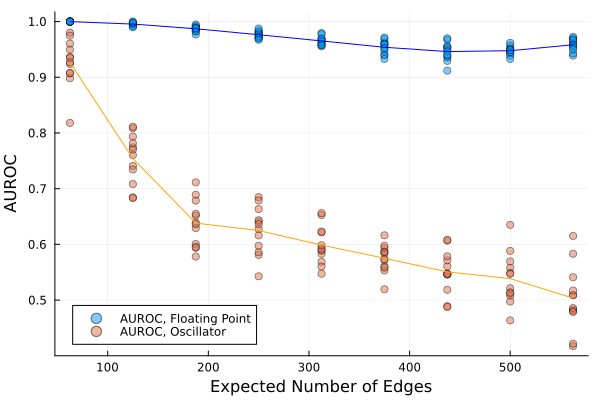

In [44]:
fig = scatter(n_edges, auroc_static, label="AUROC, Floating Point", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
#ylims!(0.80, 1.01)

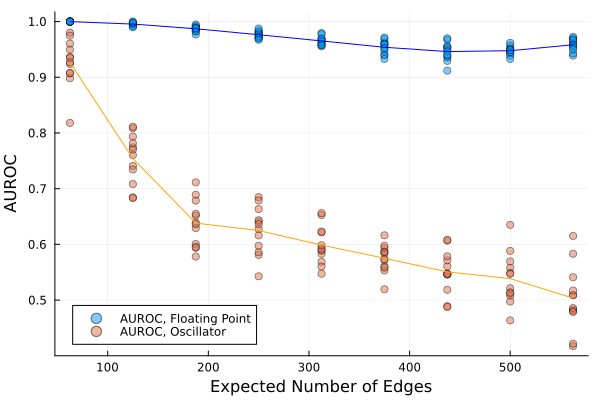

In [45]:
fig = scatter(n_edges, auroc_static, label="AUROC, Floating Point", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
#ylims!(0.80, 1.01)

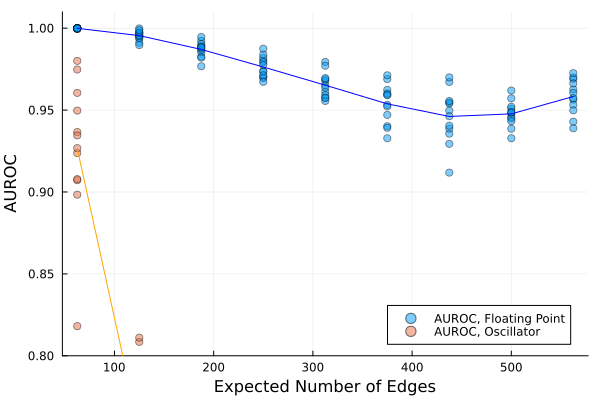

In [46]:
fig = scatter(n_edges, auroc_static, label="AUROC, Floating Point", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
ylims!(0.80, 1.01)

In [47]:
png(fig, "graph_compression.png")

"graph_compression.png"